In [1]:
import pandas as pd

In [2]:
FIRMS = pd.read_csv(r'C:\Users\Admin\Desktop\Codes\ISRO\uttarakhand_fires.csv')
FWI = pd.read_csv(r'C:\Users\Admin\Desktop\Codes\ISRO\data_2016_FWI.csv')

In [3]:
FWI['latitude'].value_counts()

latitude
31.19    5490
30.94    5490
30.69    5490
30.44    5490
30.19    5490
29.94    5490
29.69    5490
29.44    5490
29.19    5490
28.94    5490
28.69    5490
28.44    5490
Name: count, dtype: int64

In [4]:
FWI['longitude'].value_counts()

longitude
77.35    4392
77.60    4392
77.85    4392
78.10    4392
78.35    4392
78.60    4392
78.85    4392
79.10    4392
79.35    4392
79.60    4392
79.85    4392
80.10    4392
80.35    4392
80.60    4392
80.85    4392
Name: count, dtype: int64

In [5]:
FIRMS['latitude'].value_counts().sum()

np.int64(4386)

In [6]:
FIRMS.shape

(4386, 15)

In [7]:
# import pandas as pd

# longitudes = [77.35,77.60,77.85,78.10,78.35,78.60,78.85,79.10,79.35,79.60,79.85,80.10,80.35,80.60,80.85]
# latitudes  = [31.19,30.94,30.69,30.44,30.19,29.94,29.69,29.44,29.19,28.94,28.69,28.44]

# blocks = []

# for i in range(len(longitudes)-1):
#     for j in range(len(latitudes)-1):
#         block = {
#             "lon_min": longitudes[i],
#             "lon_max": longitudes[i+1],
#             "lat_min": latitudes[j+1],  # smaller latitude (south)
#             "lat_max": latitudes[j]     # larger latitude (north)
#         }
#         blocks.append(block)

# df_blocks = pd.DataFrame(blocks)
# print(df_blocks.head())
# print("Total blocks:", len(df_blocks))


In [8]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Longitudes and latitudes (edges of grid)
# longitudes = [77.35,77.60,77.85,78.10,78.35,78.60,78.85,79.10,79.35,79.60,79.85,80.10,80.35,80.60,80.85]
# latitudes  = [31.19,30.94,30.69,30.44,30.19,29.94,29.69,29.44,29.19,28.94,28.69,28.44]

# # Create blocks
# blocks = []
# for i in range(len(longitudes)-1):
#     for j in range(len(latitudes)-1):
#         block = {
#             "lon_min": longitudes[i],
#             "lon_max": longitudes[i+1],
#             "lat_min": latitudes[j+1],  # south
#             "lat_max": latitudes[j]     # north
#         }
#         blocks.append(block)

# df_blocks = pd.DataFrame(blocks)

# # Plot
# fig, ax = plt.subplots(figsize=(8,6))

# for _, row in df_blocks.iterrows():
#     rect = plt.Rectangle(
#         (row["lon_min"], row["lat_min"]),   # bottom-left corner
#         row["lon_max"]-row["lon_min"],      # width
#         row["lat_max"]-row["lat_min"],      # height
#         fill=False, edgecolor="blue"
#     )
#     ax.add_patch(rect)

# plt.scatter(FWI['longitude'],FWI['latitude'], c=FWI['FWI'], cmap='hot_r', edgecolor='k', s=20)  

# # Formatting
# ax.set_xlim(min(longitudes), max(longitudes))
# ax.set_ylim(min(latitudes), max(latitudes))
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")
# ax.set_title("Grid Blocks over Uttarakhand (Non-overlapping)")

# plt.show()




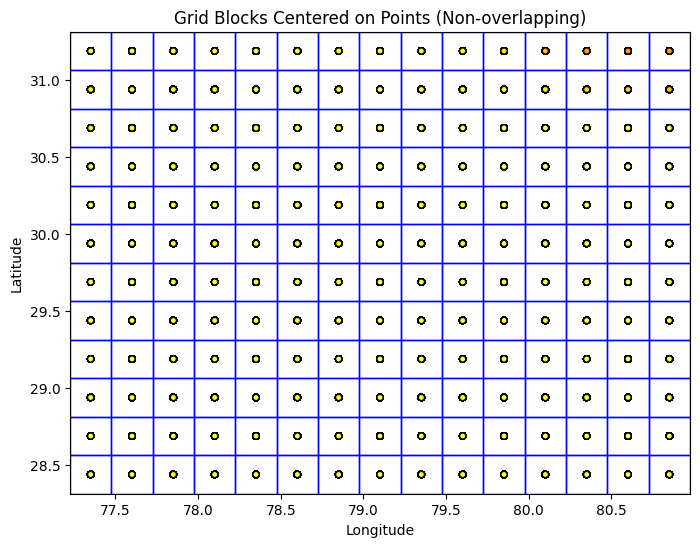

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Longitudes and latitudes (these are centers, not edges)
longitudes = [77.35,77.60,77.85,78.10,78.35,78.60,78.85,79.10,79.35,79.60,79.85,80.10,80.35,80.60,80.85]
latitudes  = [31.19,30.94,30.69,30.44,30.19,29.94,29.69,29.44,29.19,28.94,28.69,28.44]

# Compute step sizes (assume evenly spaced!)
lon_step = (longitudes[1] - longitudes[0]) / 2
lat_step = (latitudes[0] - latitudes[1]) / 2  # note: lat decreases

# Build blocks around centers
blocks = []
for lon in longitudes:
    for lat in latitudes:
        block = {
            "lon_min": lon - lon_step,
            "lon_max": lon + lon_step,
            "lat_min": lat - lat_step,
            "lat_max": lat + lat_step
        }
        blocks.append(block)

df_blocks = pd.DataFrame(blocks)

# Plot
fig, ax = plt.subplots(figsize=(8,6))

for _, row in df_blocks.iterrows():
    rect = plt.Rectangle(
        (row["lon_min"], row["lat_min"]),
        row["lon_max"]-row["lon_min"],
        row["lat_max"]-row["lat_min"],
        fill=False, edgecolor="blue"
    )
    ax.add_patch(rect)

# Example: if you have fire points (FWI DataFrame)
plt.scatter(FWI['longitude'],FWI['latitude'], c=FWI['FWI'], cmap='hot_r', edgecolor='k', s=20)

# Formatting
ax.set_xlim(min(longitudes)-lon_step, max(longitudes)+lon_step)
ax.set_ylim(min(latitudes)-lat_step, max(latitudes)+lat_step)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Grid Blocks Centered on Points (Non-overlapping)")

plt.show()


In [10]:
FWI.head()

,Unnamed: 0,valid_time,latitude,longitude,u10,v10,d2m,t2m,tp,temp_C,dew_C,humidity,temp,wind_speed,rainfall,day,month,FWI
0,0,2016-01-01 12:00:00,31.19,77.35,0.766122,0.334703,270.57650,284.43530,0.000000e+00,11.28530,-2.57350,37.854922,11.28530,0.836044,0.000000,1,1,2.202486
1,1,2016-01-01 12:00:00,31.19,77.60,0.217600,0.376696,267.45640,283.61108,0.000000e+00,10.46108,-5.69360,31.634725,10.46108,0.435028,0.000000,1,1,3.046742
2,2,2016-01-01 12:00:00,31.19,77.85,-0.547171,0.080431,263.43490,280.02612,0.000000e+00,6.87612,-9.71510,29.535902,6.87612,0.553051,0.000000,1,1,3.522762
3,3,2016-01-01 12:00:00,31.19,78.10,-0.858511,-0.191359,260.24155,275.30835,2.280576e-07,2.15835,-12.90845,31.841175,2.15835,0.879579,0.000228,1,1,3.684949
4,4,2016-01-01 12:00:00,31.19,78.35,-0.681448,-0.101698,255.02866,268.68140,1.659384e-06,-4.46860,-18.12134,33.608056,-4.46860,0.688995,0.001659,1,1,3.527760


In [11]:
FIRMS.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.0915,79.5024,304.5,1.2,1.1,2016-01-01,517,Terra,MODIS,58,6.2,285.8,8.7,D,0
1,29.9037,80.4531,344.4,1.1,1.1,2016-01-01,518,Terra,MODIS,94,6.2,289.8,60.2,D,0
2,29.8945,80.4499,325.8,1.1,1.1,2016-01-01,518,Terra,MODIS,84,6.2,290.4,27.9,D,0
3,31.1424,78.2534,310.8,2.1,1.4,2016-01-01,830,Aqua,MODIS,28,6.2,293.1,29.5,D,0
4,30.0980,78.7417,309.2,1.0,1.0,2016-01-01,2035,Aqua,MODIS,77,6.2,276.8,14.1,N,0


In [12]:
# import pandas as pd
# import numpy as np
# from scipy.spatial import cKDTree

# # Suppose FIRMS data
# # FIRMS = pd.read_csv("firms.csv")   # must have ['latitude','longitude','time']
# # FWI   = pd.read_csv("fwi.csv")     # must have ['latitude','longitude','time']

# # Ensure time is datetime
# FIRMS['acq_date'] = pd.to_datetime(FIRMS['acq_date']).dt.date
# FWI['valid_time']   = pd.to_datetime(FWI['valid_time']).dt.date

# # Grid centers (from FWI data)
# grid_points = FWI[['longitude','latitude']].values  
# grid_times  = FWI['valid_time'].values  

# # Build KDTree for nearest spatial search
# tree = cKDTree(grid_points)

# # For each FIRMS point → find nearest grid cell
# distances, indices = tree.query(FIRMS[['longitude','latitude']].values)

# # Nearest block info
# FIRMS['nearest_lon']  = grid_points[indices,0]
# FIRMS['nearest_lat']  = grid_points[indices,1]
# FIRMS['grid_time']    = grid_times[indices]

# # Check time match
# FIRMS['fire_flag'] = (FIRMS['acq_date'] == FIRMS['grid_time']).astype(int)

# print(FIRMS.head())


In [13]:
FIRMS.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.0915,79.5024,304.5,1.2,1.1,2016-01-01,517,Terra,MODIS,58,6.2,285.8,8.7,D,0
1,29.9037,80.4531,344.4,1.1,1.1,2016-01-01,518,Terra,MODIS,94,6.2,289.8,60.2,D,0
2,29.8945,80.4499,325.8,1.1,1.1,2016-01-01,518,Terra,MODIS,84,6.2,290.4,27.9,D,0
3,31.1424,78.2534,310.8,2.1,1.4,2016-01-01,830,Aqua,MODIS,28,6.2,293.1,29.5,D,0
4,30.0980,78.7417,309.2,1.0,1.0,2016-01-01,2035,Aqua,MODIS,77,6.2,276.8,14.1,N,0


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

# Example: Load datasets
# FIRMS = pd.read_csv("firms.csv")   # ['latitude','longitude','time'] (date only: YYYY-MM-DD)
# FWI   = pd.read_csv("fwi.csv")     # ['latitude','longitude','time'] (datetime: YYYY-MM-DD HH:MM:SS)


FWI['date']   = pd.to_datetime(FWI['valid_time']).dt.date
FIRMS['date'] = pd.to_datetime(FIRMS['acq_date']).dt.date

firms_points = FIRMS[['longitude','latitude']].values
firms_dates  = FIRMS['date'].values
tree = cKDTree(firms_points)

distances, indices = tree.query(FWI[['longitude','latitude']].values)

FWI['nearest_fire_lon']  = firms_points[indices,0]
FWI['nearest_fire_lat']  = firms_points[indices,1]
FWI['fire_date']         = firms_dates[indices]

FWI['fire_flag'] = (FWI['valid_time'] == FWI['fire_date']).astype(int)

print(FWI[['longitude','latitude','valid_time','fire_flag']].head())


   longitude  latitude           valid_time  fire_flag
0      77.35     31.19  2016-01-01 12:00:00          0
1      77.60     31.19  2016-01-01 12:00:00          0
2      77.85     31.19  2016-01-01 12:00:00          0
3      78.10     31.19  2016-01-01 12:00:00          0
4      78.35     31.19  2016-01-01 12:00:00          0


In [15]:
FIRMS.shape

(4386, 16)

In [16]:
FWI.head()

,Unnamed: 0,valid_time,latitude,longitude,u10,v10,d2m,t2m,tp,temp_C,...,wind_speed,rainfall,day,month,FWI,date,nearest_fire_lon,nearest_fire_lat,fire_date,fire_flag
0,0,2016-01-01 12:00:00,31.19,77.35,0.766122,0.334703,270.57650,284.43530,0.000000e+00,11.28530,...,0.836044,0.000000,1,1,2.202486,2016-01-01,77.5885,31.0064,2016-12-22,0
1,1,2016-01-01 12:00:00,31.19,77.60,0.217600,0.376696,267.45640,283.61108,0.000000e+00,10.46108,...,0.435028,0.000000,1,1,3.046742,2016-01-01,77.6664,31.1985,2016-12-18,0
2,2,2016-01-01 12:00:00,31.19,77.85,-0.547171,0.080431,263.43490,280.02612,0.000000e+00,6.87612,...,0.553051,0.000000,1,1,3.522762,2016-01-01,77.8419,31.2266,2016-12-22,0
3,3,2016-01-01 12:00:00,31.19,78.10,-0.858511,-0.191359,260.24155,275.30835,2.280576e-07,2.15835,...,0.879579,0.000228,1,1,3.684949,2016-01-01,78.0841,31.2154,2016-02-06,0
4,4,2016-01-01 12:00:00,31.19,78.35,-0.681448,-0.101698,255.02866,268.68140,1.659384e-06,-4.46860,...,0.688995,0.001659,1,1,3.527760,2016-01-01,78.3039,31.1807,2016-12-22,0


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

FWI['date']   = pd.to_datetime(FWI['valid_time']).dt.date
FIRMS['date'] = pd.to_datetime(FIRMS['acq_date']).dt.date

FWI['fire_flag'] = 0

for d in FIRMS['date'].unique():
    fwi_day   = FWI[FWI['date'] == d]
    firms_day = FIRMS[FIRMS['date'] == d]

    if fwi_day.empty or firms_day.empty:
        continue

    tree = cKDTree(fwi_day[['longitude','latitude']].values)

    distances, indices = tree.query(firms_day[['longitude','latitude']].values)
    

    nearest_indices = fwi_day.iloc[indices].index
    FWI.loc[nearest_indices, 'fire_flag'] = 1

print(FWI[['longitude','latitude','fire_flag']].head(20))


    longitude  latitude  fire_flag
0       77.35     31.19          0
1       77.60     31.19          0
2       77.85     31.19          0
3       78.10     31.19          0
4       78.35     31.19          1
5       78.60     31.19          0
6       78.85     31.19          0
7       79.10     31.19          0
8       79.35     31.19          0
9       79.60     31.19          0
10      79.85     31.19          0
11      80.10     31.19          0
12      80.35     31.19          0
13      80.60     31.19          0
14      80.85     31.19          0
15      77.35     30.94          0
16      77.60     30.94          0
17      77.85     30.94          0
18      78.10     30.94          0
19      78.35     30.94          0


In [18]:
FWI['fire_flag'].value_counts()

fire_flag
0    64191
1     1689
Name: count, dtype: int64

In [19]:
FWI_FIRMS = FWI

In [20]:
FWI_FIRMS.head()

,Unnamed: 0,valid_time,latitude,longitude,u10,v10,d2m,t2m,tp,temp_C,...,wind_speed,rainfall,day,month,FWI,date,nearest_fire_lon,nearest_fire_lat,fire_date,fire_flag
0,0,2016-01-01 12:00:00,31.19,77.35,0.766122,0.334703,270.57650,284.43530,0.000000e+00,11.28530,...,0.836044,0.000000,1,1,2.202486,2016-01-01,77.5885,31.0064,2016-12-22,0
1,1,2016-01-01 12:00:00,31.19,77.60,0.217600,0.376696,267.45640,283.61108,0.000000e+00,10.46108,...,0.435028,0.000000,1,1,3.046742,2016-01-01,77.6664,31.1985,2016-12-18,0
2,2,2016-01-01 12:00:00,31.19,77.85,-0.547171,0.080431,263.43490,280.02612,0.000000e+00,6.87612,...,0.553051,0.000000,1,1,3.522762,2016-01-01,77.8419,31.2266,2016-12-22,0
3,3,2016-01-01 12:00:00,31.19,78.10,-0.858511,-0.191359,260.24155,275.30835,2.280576e-07,2.15835,...,0.879579,0.000228,1,1,3.684949,2016-01-01,78.0841,31.2154,2016-02-06,0
4,4,2016-01-01 12:00:00,31.19,78.35,-0.681448,-0.101698,255.02866,268.68140,1.659384e-06,-4.46860,...,0.688995,0.001659,1,1,3.527760,2016-01-01,78.3039,31.1807,2016-12-22,1


In [21]:
FWI_FIRMS.columns

Index(['Unnamed: 0', 'valid_time', 'latitude', 'longitude', 'u10', 'v10',
       'd2m', 't2m', 'tp', 'temp_C', 'dew_C', 'humidity', 'temp', 'wind_speed',
       'rainfall', 'day', 'month', 'FWI', 'date', 'nearest_fire_lon',
       'nearest_fire_lat', 'fire_date', 'fire_flag'],
      dtype='object')

In [24]:
FWI_FIRMS.drop(columns=['Unnamed: 0', 'valid_time','day', 'month', 'fire_date'],inplace=True)

In [25]:
FWI_FIRMS.to_csv('FLAGED_data.csv')

In [26]:
FWI_FIRMS[FWI_FIRMS['fire_flag']==1]

,latitude,longitude,u10,v10,d2m,t2m,tp,temp_C,dew_C,humidity,temp,wind_speed,rainfall,FWI,date,nearest_fire_lon,nearest_fire_lat,fire_flag
4,31.19,78.35,-0.681448,-0.101698,255.02866,268.68140,1.659384e-06,-4.46860,-18.12134,33.608056,-4.46860,0.688995,0.001659,3.527760,2016-01-01,78.3039,31.1807,1
66,30.19,78.85,1.316721,0.723009,274.83530,287.50464,0.000000e+00,14.35464,1.68530,42.222200,14.35464,1.502164,0.000000,7.576511,2016-01-01,78.8391,30.1944,1
69,30.19,79.60,0.210031,0.510119,268.30600,280.73804,7.601921e-08,7.58804,-4.84400,40.957037,7.58804,0.551665,0.000076,7.867825,2016-01-01,79.5541,30.1897,1
87,29.94,80.35,0.487680,0.191515,269.38998,280.92260,0.000000e+00,7.77260,-3.76002,43.879772,7.77260,0.523937,0.000000,7.672578,2016-01-01,80.3150,29.9157,1
217,30.69,79.10,-0.084445,-0.704555,257.12933,269.85670,0.000000e+00,-3.29330,-16.02067,36.707715,-3.29330,0.709597,0.000000,13.907877,2016-01-02,79.0940,30.6504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65484,28.94,79.60,-0.758783,0.147559,286.48373,289.04443,5.140901e-07,15.89443,13.33373,84.757204,15.89443,0.772998,0.000514,9.018820,2016-12-29,79.6085,28.9244,1
65642,29.19,77.85,-2.235546,1.233594,286.35025,289.16650,0.000000e+00,16.01650,13.20025,83.369073,16.01650,2.553316,0.000000,10.639423,2016-12-30,77.8676,29.2159,1
65821,29.19,77.60,-1.501131,1.910428,286.54388,290.44310,0.000000e+00,17.29310,13.39388,77.847627,17.29310,2.429636,0.000000,11.503596,2016-12-31,77.5908,29.2043,1
65827,29.19,79.10,-1.797396,1.011869,286.12787,290.50660,0.000000e+00,17.35660,12.97787,75.457580,17.35660,2.062646,0.000000,11.665784,2016-12-31,79.0951,29.1972,1


In [ ]:
# fire_to_fwi = []

# for d in FIRMS['date'].unique():
#     fwi_day   = FWI[FWI['valid_time'] == d]
#     firms_day = FIRMS[FIRMS['acq_date'] == d]

#     if fwi_day.empty or firms_day.empty:
#         continue

#     tree = cKDTree(fwi_day[['longitude','latitude']].values)
#     distances, indices = tree.query(firms_day[['longitude','latitude']].values)

#     # Record mapping
#     for i, f_idx in enumerate(firms_day.index):
#         nearest_fwi_idx = fwi_day.iloc[indices[i]].name
#         fire_to_fwi.append((f_idx, nearest_fwi_idx))

# # Make dataframe: FIRMS fire → nearest FWI row
# mapping_df = pd.DataFrame(fire_to_fwi, columns=['firms_index','fwi_index'])

# # Count how many FIRMS fires per FWI cell
# counts = mapping_df.groupby('fwi_index').size()

# # Add to FWI
# FWI['fire_count'] = 0
# FWI.loc[counts.index, 'fire_count'] = counts.values
# FWI['fire_flag'] = (FWI['fire_count'] > 0).astype(int)

# print(FWI[['longitude','latitude','valid_time','fire_count','fire_flag']].head(20))


In [ ]:
from scipy.spatial import cKDTree
import numpy as np

fire_coords = FIRMS[['latitude', 'longitude']].to_numpy()
map_coords = FWI[['latitude', 'longitude']].to_numpy()

tree = cKDTree(map_coords)

distances, indices = tree.query(fire_coords, k=1)  # k=1 for nearest

FIRMS['nearest_point_index'] = indices
FIRMS['nearest_point_lat'] = FWI.loc[indices, 'latitude'].values
FIRMS['nearest_point_lon'] = FWI.loc[indices, 'longitude'].values
FIRMS['distance_to_point'] = distances


In [28]:
FIRMS.to_csv("fires_with_nearest_points.csv", index=False)


In [29]:
!pip install rasterstats


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import rasterio
import geopandas as gpd
import pandas as pd
from rasterstats import point_query

raster_path = "MCD12Q1_landcover.tif"
src = rasterio.open(raster_path)

gdf = gpd.GeoDataFrame(
    FWI,
    geometry=gpd.points_from_xy(FWI.longitude, FWI.latitude),
    crs="EPSG:4326"
)

FWI['veg_class'] = point_query(gdf.geometry, raster_path)

modis_classes = {
    1: "Evergreen Needleleaf Forest",
    2: "Evergreen Broadleaf Forest",
    3: "Deciduous Needleleaf Forest",
    4: "Deciduous Broadleaf Forest",
    5: "Mixed Forest",
    6: "Closed Shrubland",
    7: "Open Shrubland",
    8: "Woody Savanna",
    9: "Savanna",
    10: "Grassland",
    12: "Cropland",
    13: "Urban",
    16: "Barren",
    17: "Water"
}
FWI['vegetation_type'] = FWI['veg_class'].map(modis_classes)

print(FWI[['longitude','latitude','date','fire_flag','vegetation_type']].head())


RasterioIOError: MCD12Q1_landcover.tif: No such file or directory